In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df2 = pd.read_csv(r"C:\Users\nikol\OneDrive\Υπολογιστής\Python\Data Analysis with Python\statsmodels\second order slip equation.csv")
df2.head()

,kair(mD),1/Pavg(1/atm)
0,79.313437,0.844791
1,78.934283,0.816625
2,77.641023,0.796703
3,77.059404,0.777730
4,75.620089,0.755733


In [3]:
#Create single dimension
x2 = df2["1/Pavg(1/atm)"]
y2 = df2["kair(mD)"]

In [4]:
x2

0     0.844791
1     0.816625
2     0.796703
3     0.777730
4     0.755733
5     0.740501
6     0.722303
7     0.708377
8     0.869791
9     0.854617
10    0.842370
11    0.832823
12    0.828130
13    0.818901
14    0.812113
15    0.805436
16    0.798869
17    0.790277
18    0.783953
19    0.781868
20    0.779794
21    0.775678
22    0.771605
23    0.765576
24    0.761608
25    0.759640
26    0.757681
27    0.753795
28    0.748040
29    0.744251
30    0.736789
31    0.731289
32    0.725871
33    0.720533
34    0.715272
35    0.706674
Name: 1/Pavg(1/atm), dtype: float64

In [5]:
inds = x2.ravel().argsort()  # Sort x values and get index    
x2 = x2.ravel()[inds].reshape(-1,1)
y2 = y2[inds] #Sort y according to x sorted index

In [6]:
x2

array([[0.70667366],
       [0.70837682],
       [0.71527236],
       [0.72053276],
       [0.72230346],
       [0.7258711 ],
       [0.73128914],
       [0.73678868],
       [0.74050121],
       [0.74425136],
       [0.74803968],
       [0.75379502],
       [0.7557332 ],
       [0.75768137],
       [0.75963962],
       [0.76160801],
       [0.76557555],
       [0.77160499],
       [0.77567765],
       [0.77773015],
       [0.77979354],
       [0.78186791],
       [0.78395334],
       [0.79027692],
       [0.79670334],
       [0.79886878],
       [0.80543628],
       [0.81211266],
       [0.81662541],
       [0.81890065],
       [0.8281298 ],
       [0.83282283],
       [0.8423703 ],
       [0.84479146],
       [0.85461693],
       [0.86979128]])

In [13]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(2)
xp2 = polynomial_features.fit_transform(x2)

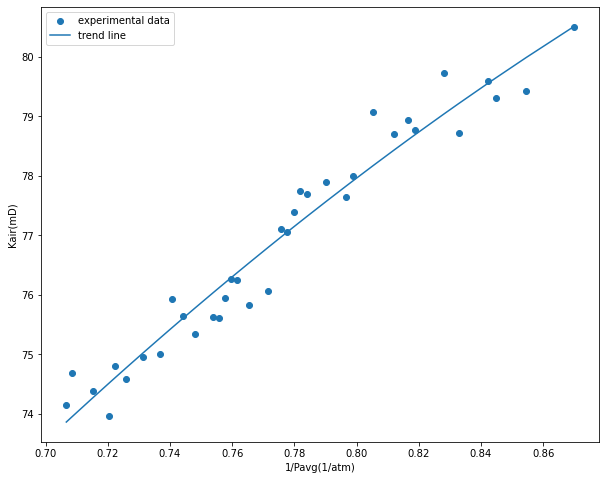

In [14]:
import statsmodels.api as sm

model = sm.OLS(y2, xp2).fit()
ypred2 = model.predict(xp2) 

width = 10
height = 8
plt.figure(figsize=(width, height))
plt.scatter(x2, y2, label="experimental data")
plt.plot(x2, ypred2, label="trend line")

plt.xlabel("1/Pavg(1/atm)")
plt.ylabel("Kair(mD)")
plt.legend();

In [15]:
f = np.polyfit(df2["1/Pavg(1/atm)"], df2["kair(mD)"],2)
p = np.poly1d(f)
print(p)

        2
-45.81 x + 113 x + 16.92


In [16]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               kair(mD)   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     320.4
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           2.43e-22
Time:                        22:20:35   Log-Likelihood:                -18.475
No. Observations:                  36   AIC:                             42.95
Df Residuals:                      33   BIC:                             47.70
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9162     21.859      0.774      0.4

<h4>An estimation of the variance of y:</h4>

In [11]:
model.scale

0.23867849179475248

<h4>The standard error for the y estimate:</h4>

In [12]:
np.sqrt(model.scale)

0.4885473281011293